# Exercise 8

### The situation

It is well known that many hormones have diurnal fluctuations. Your boss wants a descriptive function to describe this fluctuation over the course of a single day. She has data on relative melatonin level vs. relative time of day that you can use.

### The Basics

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
md = pd.read_csv("datasets/008ExerciseFile.csv")

In [7]:
display(md)

,rel_time,m_level
0,-10.000000,166.846602
1,-9.797980,243.656949
2,-9.595960,354.591642
3,-9.393939,209.023218
4,-9.191919,283.431508
...,...,...
95,9.191919,255.174991
96,9.393939,152.987761
97,9.595960,142.685158
98,9.797980,189.684193


#### Plain Scatter Plot

<AxesSubplot:xlabel='rel_time', ylabel='m_level'>

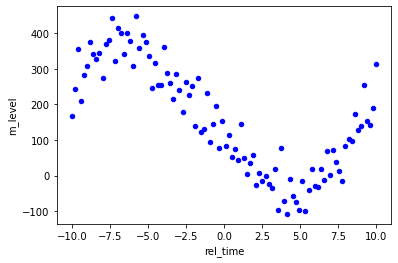

In [9]:
md.plot(x='rel_time', y='m_level', kind='scatter', color='b')

### Straight Line

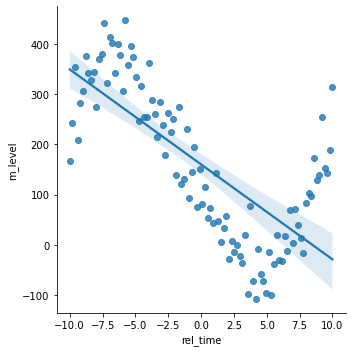

In [10]:
sns.lmplot(data=md, x='rel_time', y='m_level')

In [11]:
myfit = np.polyfit(x=md['rel_time'], y=md['m_level'], deg=1)
print(myfit)

[-18.91517148 160.25727447]


<AxesSubplot:xlabel='rel_time', ylabel='m_level'>

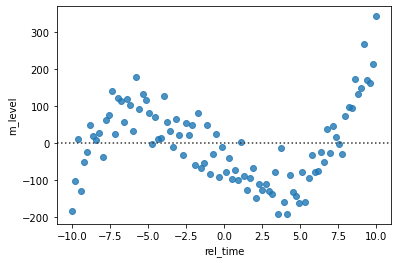

In [13]:
sns.residplot(data=md, x='rel_time', y='m_level')

In [14]:
fitvals = np.polyval(myfit, md['rel_time'])

In [15]:
myres = md['m_level'] - fitvals

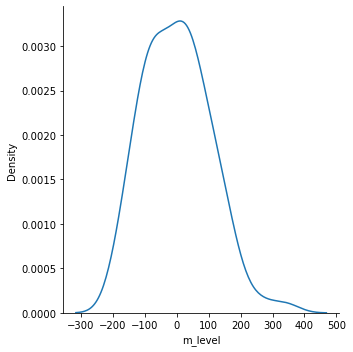

In [16]:
sns.displot(myres, kind='kde')

In [22]:
np.std(myres)

104.76481228544043

#### Why the first order polynomial isn't a good fit
The straight line fit doesn't properly model the data because it systematically overestimates, underestimates, overestimates, and the understimates again. Also the error bounds of the line of best fit are rather large. Looking at the residual plot, the residuals should be randomly and symmetrically distributed around 0, but this is not the case.

### Another Fit: Second Order Polynomial

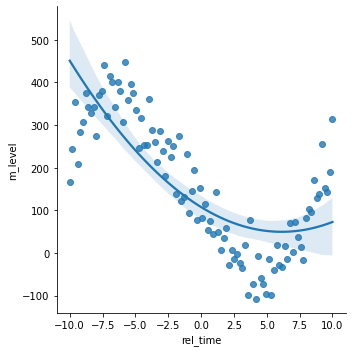

In [17]:
sns.lmplot(data=md, x='rel_time', y='m_level', order = 2)

<AxesSubplot:xlabel='rel_time', ylabel='m_level'>

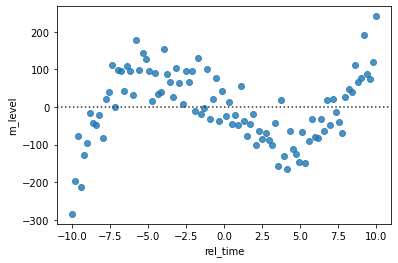

In [20]:
sns.residplot(data=md, x='rel_time', y='m_level', order=2)

In [24]:
myfit = np.polyfit(x=md['rel_time'], y=md['m_level'], deg=2)
print(myfit)

[  1.5417871  -18.91517148 107.82613075]


In [25]:
fitvals = np.polyval(myfit, md['rel_time'])

In [26]:
myres = md['m_level'] - fitvals

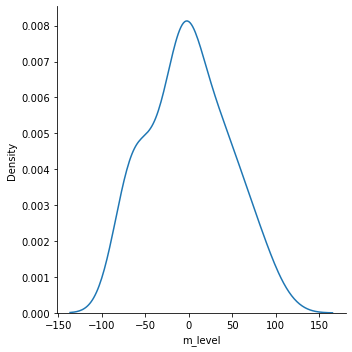

In [47]:
sns.displot(myres, kind='kde')

In [28]:
np.std(myres)

93.68620954635846

#### Why the second order polynomial isn't the best fit
The second order polynomial isn't the best fit for the same reason as the first order polynomial. The line of best fit systematically overestimates, underestimates, overestimates, and underestimates the data. The scatterplot of the residuals reveals that the residuals are not normally distributed around 0.

### Best Fit: Third Order Polynomial

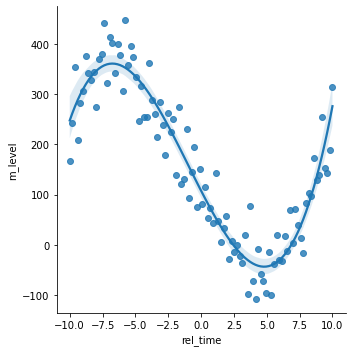

In [19]:
sns.lmplot(data=md, x='rel_time', y='m_level', order=3)

<AxesSubplot:xlabel='rel_time', ylabel='m_level'>

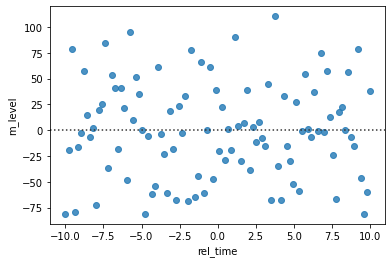

In [21]:
sns.residplot(data=md, x='rel_time', y='m_level', order=3)

In [29]:
myfit = np.polyfit(x=md['rel_time'], y=md['m_level'], deg=3)
print(myfit)

[  0.52406776   1.5417871  -50.9901931  107.82613075]


In [31]:
fitvals = np.polyval(myfit, md['rel_time'])

In [32]:
myres = md['m_level'] - fitvals

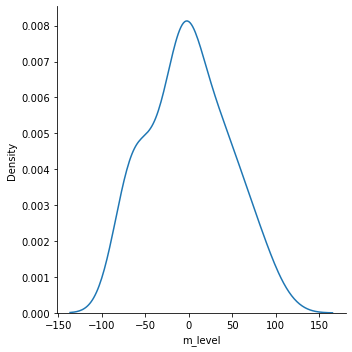

In [46]:
sns.displot(myres, kind='kde')

#### Why this is the best plot
The third order polynomial is the best fit line because it minimizes the distance between the the data points and the line throughout the whole range. Additionally, the scatter plot of the residuals is roughly normally distributed around 0, Which is further demonstrated with the kde plot above.

### Pretty Plot and Fit

Text(0.5, 1.0, 'Fluctuations in Melatonin Level Over Time')

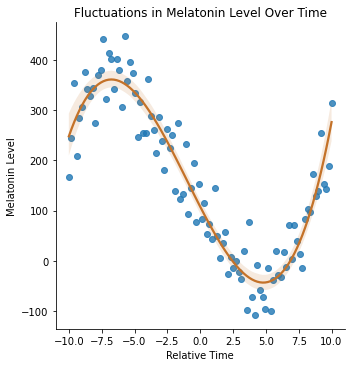

In [45]:
sns.lmplot(data=md, x='rel_time', y='m_level', order=3, line_kws={'color': '#c47229'})
plt.xlabel("Relative Time")
plt.ylabel("Melatonin Level")
plt.title("Fluctuations in Melatonin Level Over Time")